In [29]:
import uproot
import awkward as ak
from coffea import nanoevents
import numpy as np
import pandas as pd

import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

In [30]:
file = pd.read_parquet(f'../outfiles/0-1_had.parquet')
# file = pd.read_parquet(f'/eos/uscms/store/user/aaportel/boostedhiggs/dec_4_top_2016_2016/TTToSemiLeptonic/outfiles/0-10_ele.parquet')

In [37]:
file

,METpt,METphi,"dR(lep, lep_fatjet)",fj_isTop,fj_isTop_Matched,fj_Top_numMatched,fj_isTop_W_lep_b,fj_isTop_W_lep,fj_isTop_W_ele_b,fj_isTop_W_ele,...,lepPt,lepEta,lepPhi,lepMass,had_subjetPt,had_subjetEta,had_subjetPhi,had_subjetMass,had_subjetBscore,weight_had
0,118.795700,2.374512,3.143228,True,True,1,0,0,0,0,...,74.150726,-0.149750,-0.348206,0.105713,429.0000,-0.123550,-0.443787,90.812500,0.116089,303.358002
1,213.528351,-1.866211,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,484.2500,1.543213,1.708984,89.437500,0.652344,303.358002
2,205.026657,-3.045898,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,377.7500,1.532227,0.407166,121.875000,0.478516,303.358002
3,213.742325,0.238953,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,76.0000,-0.044235,-2.184570,9.085938,0.979492,303.358002
4,42.173244,1.502441,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,121.1250,-0.289001,2.156250,23.937500,0.133667,303.358002
5,317.103546,-2.901855,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,128.3750,-2.351074,0.446716,18.656250,0.990234,303.358002
6,93.266815,2.710938,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,107.6875,0.080811,-0.122650,6.941406,0.417236,303.358002
7,132.808365,-1.475098,NaN,True,True,1,0,0,0,0,...,NaN,NaN,NaN,NaN,154.3750,-0.821899,1.757080,18.218750,0.788574,303.358002
8,81.114792,2.674805,0.174833,True,True,1,0,0,0,0,...,63.915325,1.907471,2.635254,0.105713,92.6875,0.750122,-1.494141,12.960938,0.996582,303.358002
9,248.112778,-0.235657,0.100617,True,True,1,0,0,0,0,...,205.086670,0.696533,-0.078568,0.105713,114.0000,-0.595337,2.530273,12.062500,0.609375,303.358002


In [38]:
file.keys()

Index(['METpt', 'METphi', 'dR(lep, lep_fatjet)', 'fj_isTop',
       'fj_isTop_Matched', 'fj_Top_numMatched', 'fj_isTop_W_lep_b',
       'fj_isTop_W_lep', 'fj_isTop_W_ele_b', 'fj_isTop_W_ele',
       'fj_isTop_W_mu_b', 'fj_isTop_W_mu', 'fj_isTop_W_tau_b',
       'fj_isTop_W_tau', 'fj_Top_nquarksnob', 'fj_Top_nbquarks',
       'fj_Top_ncquarks', 'fj_Top_nleptons', 'fj_Top_nele', 'fj_Top_nmu',
       'fj_Top_ntau', 'fj_Top_taudecay', 'first_gTopLep_pt',
       'first_gTopLep_eta', 'first_gTopLep_phi', 'first_gTopLep_mass',
       'gLep_b_pt', 'gLep_b_eta', 'gLep_b_phi', 'gLep_b_mass', 'lep_fatjetPt',
       'lep_fatjetEta', 'lep_fatjetPhi', 'lep_fatjetMass', 'had_fatjetPt',
       'had_fatjetEta', 'had_fatjetPhi', 'had_fatjetMass', 'had_fatjetTau32',
       'lepPt', 'lepEta', 'lepPhi', 'lepMass', 'had_subjetPt', 'had_subjetEta',
       'had_subjetPhi', 'had_subjetMass', 'had_subjetBscore', 'weight_had'],
      dtype='object')

In [12]:
def delta_phi(phi1, phi2):
    return np.arctan2(np.sin(phi1 - phi2), np.cos(phi1 - phi2))

def deltaR(eta1, phi1, eta2, phi2):

    delta_eta = eta1 - eta2
    delta_phi = delta_phi(phi1, phi2)
    return np.sqrt(delta_eta**2 + delta_phi**2)

def plot_histogram(df, column, min_val, max_val, bins=30, xlabel='', ylabel='Frequency', title=''):
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    # Data for plotting
    data_to_plot = df[column]

    # Check if the data is boolean and convert to numeric if so
    if pd.api.types.is_bool_dtype(data_to_plot):
        data_to_plot = data_to_plot.astype(int)

    # Check if the data is now numeric (including after conversion)
    if not pd.api.types.is_numeric_dtype(data_to_plot):
        print(f"Skipping non-numeric column: {column}")
        return

    # Determine x limits
    
    x_limits = (min_val, max_val)

    # Use mplhep for the plot
   # hep.style.use('CMS')  # or another style like 'ATLAS', 'LHCb'
    
    # Creating the histogram
    #plt.figure(figsize=(10, 6))
    plt.hist(data_to_plot, bins=bins, range=x_limits, histtype='step', label=column)

    # Setting labels and title
    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    # plt.yscale('log')
    # Show the plot
    #plt.show()



# No BTAG

In [21]:
import uproot
import awkward as ak
from coffea import nanoevents
import numpy as np
import pandas as pd

import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)
import pandas as pd
import glob

def delta_phi(phi1, phi2):
    return np.arctan2(np.sin(phi1 - phi2), np.cos(phi1 - phi2))

def deltaR(eta1, phi1, eta2, phi2):
    delta_eta = eta1 - eta2
    d_phi = delta_phi(phi1, phi2)  # Changed to d_phi to avoid name conflict
    return np.sqrt(delta_eta**2 + d_phi**2)

def plot_histogram(ax, df, column, min_val, max_val, bins=30, xlabel='', ylabel='Frequency', title=''):
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame")

    data_to_plot = df[column]

    if pd.api.types.is_bool_dtype(data_to_plot):
        data_to_plot = data_to_plot.astype(int)

    if not pd.api.types.is_numeric_dtype(data_to_plot):
        print(f"Skipping non-numeric column: {column}")
        return

    x_limits = (min_val, max_val)

    ax.hist(data_to_plot, bins=bins, range=x_limits, histtype='step', label=column)

    ax.set_xlabel(xlabel if xlabel else column)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

# parquet_files = glob.glob('/eos/uscms/store/user/aaportel/boostedhiggs/jan_25_inference_2016/TTToSemiLeptonic/outfiles/*.parquet')
# parquet_files = glob.glob('/eos/uscms/store/user/aaportel/boostedhiggs/feb_5_mc_sf_small_2016/QCD_Pt_*/outfiles/*.parquet')
parquet_files = glob.glob('/eos/uscms/store/user/aaportel/boostedhiggs/feb_8_data_sf_inference_2016/JetHT_Run2016F/outfiles/')
dfs = [pd.read_parquet(file) for file in parquet_files]
combined_df = pd.concat(dfs, ignore_index=True)

combined_df

,METpt,METphi,lep_fatjetPt,lep_fatjetEta,lep_fatjetPhi,lep_fatjetMass,had_fatjetPt,had_fatjetEta,had_fatjetPhi,had_fatjetMass,had_fatjetTau32,lepPt,lepEta,lepPhi,lepMass,had_subjetPt,had_subjetEta,had_subjetPhi,had_subjetMass,had_subjetBscore
0,29.623322,-0.774170,499.50,1.211670,1.363281,3.288687,658.00,-0.828735,-2.000977,201.175804,0.443692,NaN,NaN,NaN,NaN,153.500,-1.257568,-2.184570,17.96875,0.293457
1,48.077011,0.944824,486.75,-0.037010,2.608887,106.841990,589.00,0.784912,-1.288574,200.964639,0.486153,NaN,NaN,NaN,NaN,507.500,0.701050,-1.376465,92.75000,0.689453
2,13.621726,0.806519,459.50,0.420349,1.920410,1.749651,482.00,-0.832031,-1.224121,167.588229,0.517784,NaN,NaN,NaN,NaN,109.625,-0.379456,-1.402344,23.31250,0.640137
3,57.142815,-1.528564,472.50,1.419189,-1.563721,10.792725,561.00,0.531372,1.527588,194.993963,0.385150,NaN,NaN,NaN,NaN,463.750,0.519531,1.411621,103.37500,0.240234
4,38.305119,2.178711,393.25,-0.040176,1.985352,17.017100,500.75,1.999268,-1.192383,130.227944,0.441176,NaN,NaN,NaN,NaN,383.500,2.083984,-1.194092,59.43750,0.625977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254103,130.152130,-1.736328,495.75,0.011169,-1.800049,4.200263,675.00,-0.723389,1.251953,200.533992,0.511968,NaN,NaN,NaN,NaN,585.000,-0.704834,1.315918,142.50000,0.762207
254104,74.526817,-0.962524,319.25,-2.010254,-1.531494,6.322027,489.50,-0.082825,1.438232,131.708067,0.508953,NaN,NaN,NaN,NaN,419.500,-0.064072,1.350098,51.46875,0.120239
254105,47.213860,1.178711,406.50,0.433899,-2.476074,149.782615,457.75,1.923584,0.515137,181.605203,0.510586,NaN,NaN,NaN,NaN,360.000,2.025391,0.490601,89.56250,0.537109
254106,88.418251,0.493652,369.50,-1.395508,0.054146,25.141139,490.25,-0.180481,3.032227,178.537108,0.516402,NaN,NaN,NaN,NaN,286.000,-0.374084,-3.093750,39.68750,0.407471


In [24]:
[thing for thing in combined_df if '' in thing.lower()]

['METpt',
 'METphi',
 'lep_fatjetPt',
 'lep_fatjetEta',
 'lep_fatjetPhi',
 'lep_fatjetMass',
 'had_fatjetPt',
 'had_fatjetEta',
 'had_fatjetPhi',
 'had_fatjetMass',
 'had_fatjetTau32',
 'lepPt',
 'lepEta',
 'lepPhi',
 'lepMass',
 'had_subjetPt',
 'had_subjetEta',
 'had_subjetPhi',
 'had_subjetMass',
 'had_subjetBscore']

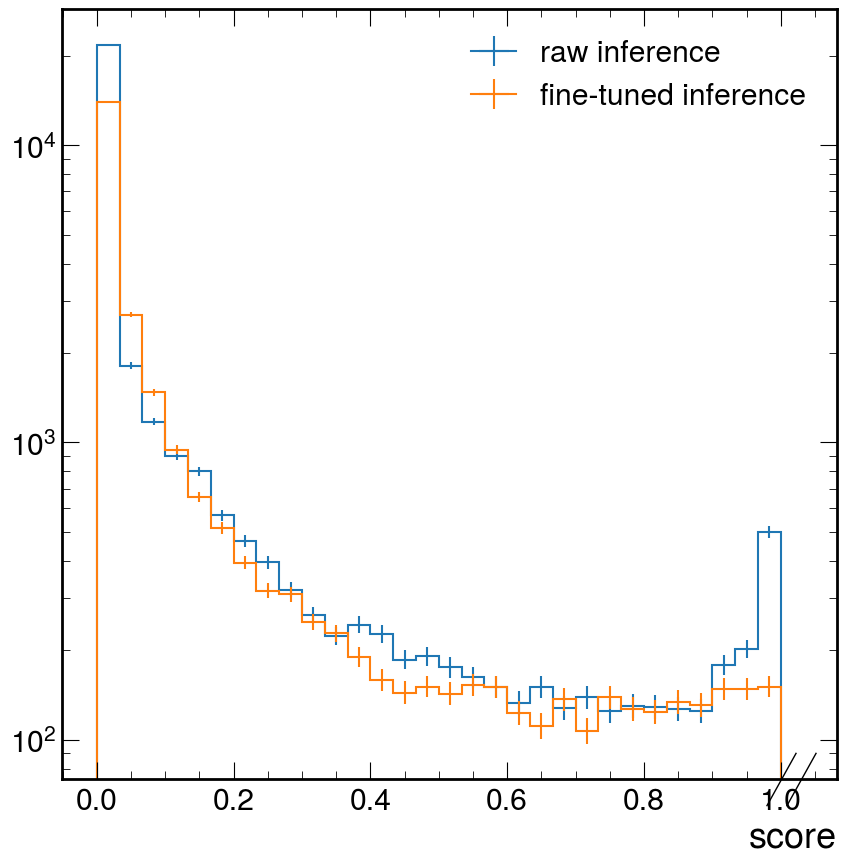

In [72]:
import onnxruntime as ort
import scipy
import onnx

data = combined_df

PATH = f"model.onnx"
input_dict = {
    "highlevel": data.loc[:, "fj_ParT_hidNeuron000":"fj_ParT_hidNeuron127"].values.astype("float32"),
}
onnx_model = onnx.load(PATH)
onnx.checker.check_model(onnx_model)

ort_sess = ort.InferenceSession(
    PATH,
    providers=["AzureExecutionProvider"],
)
outputs = ort_sess.run(None, input_dict)
prob_H = scipy.special.softmax(outputs[0], axis=1)[:, 0]   # recall: [class_H, class_W, class_Top, class_QCD]


fig, ax = plt.subplots()
h1 = Hist(hist.axis.Regular(30, 0, 1, name=r"score"), label = "fj_ParT_score")
h2 = Hist(hist.axis.Regular(30, 0, 1, name=r"score"), label = "prob_H")

h1.fill(data['fj_ParT_score'])
h2.fill(prob_H)
hep.histplot(h1, ax=ax, label = "raw inference")
hep.histplot(h2, ax=ax, label = "fine-tuned inference")
plt.legend()
plt.yscale('log')
plt.show()

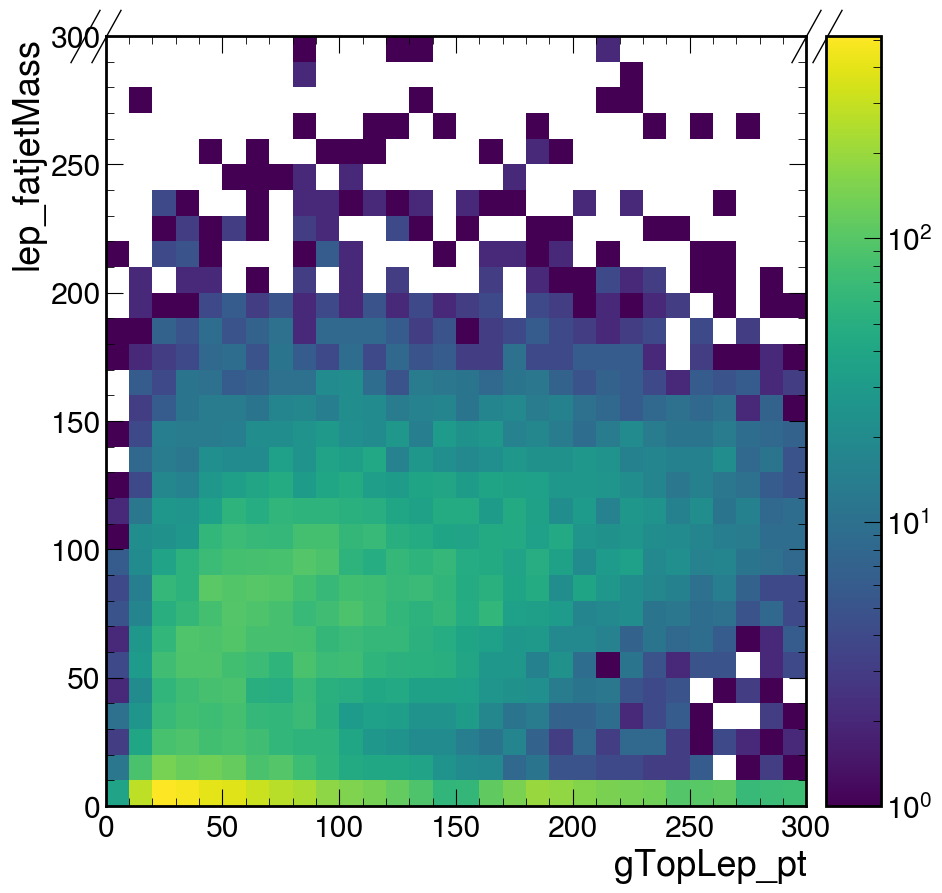

In [73]:
from matplotlib.colors import LogNorm

# Careate the figure and axis
fig, ax = plt.subplots()

# Create the histogram
h = Hist(
    hist.axis.Regular(30, 0, 300, name=r"gTopLep_pt"),
    hist.axis.Regular(30, 0, 300, name=r"lep_fatjetMass"),
)

# Fill the histogram with your data
h.fill(
    combined_df['first_gTopLep_pt'],
    combined_df['lep_fatjetMass'],
)

# Plot the histogram with logarithmic color scale
hep.hist2dplot(h, ax=ax, norm=LogNorm())

# Show the plot
plt.show()

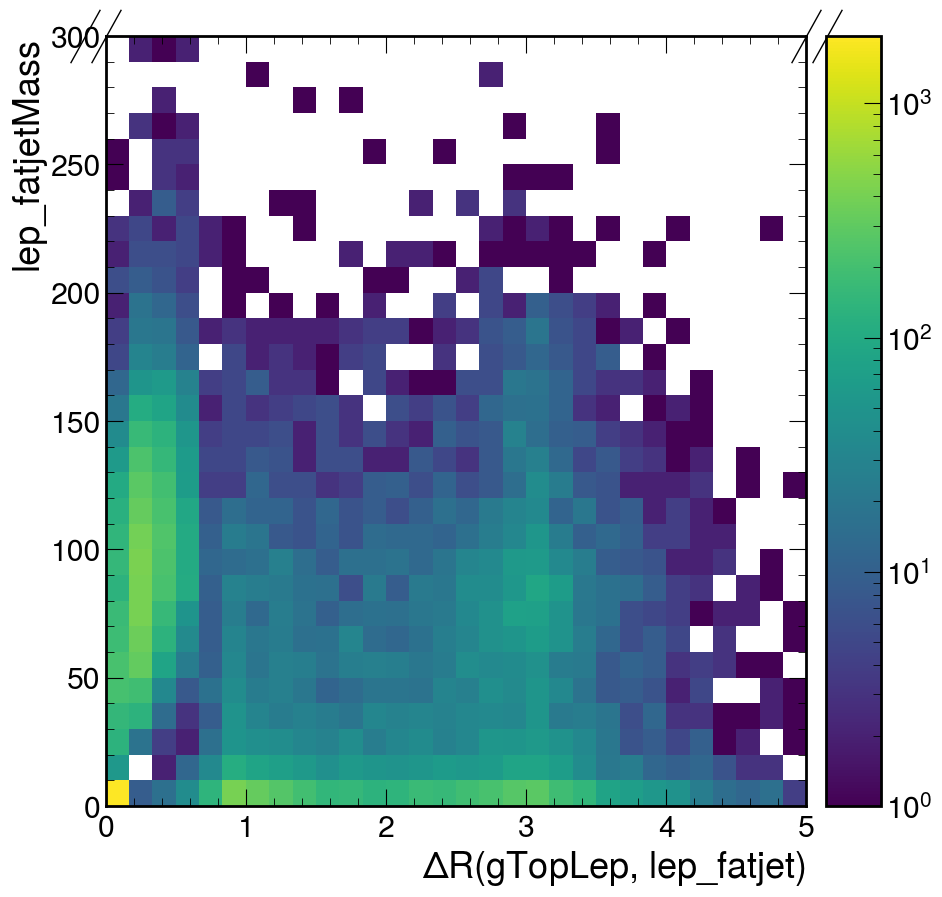

In [74]:
from matplotlib.colors import LogNorm

# Create the figure and axis
fig, ax = plt.subplots()

# Create the histogram
h = Hist(
    hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(gTopLep, lep_fatjet)"),
    hist.axis.Regular(30, 0, 300, name=r"lep_fatjetMass"),
)

# Fill the histogram with your data
h.fill(
    deltaR(combined_df['first_gTopLep_eta'], combined_df['first_gTopLep_phi'], combined_df['lep_fatjetEta'], combined_df['lep_fatjetPhi']),
    combined_df['lep_fatjetMass'],
)

# Plot the histogram with logarithmic color scale
hep.hist2dplot(h, ax=ax, norm=LogNorm())

# Show the plot
plt.show()

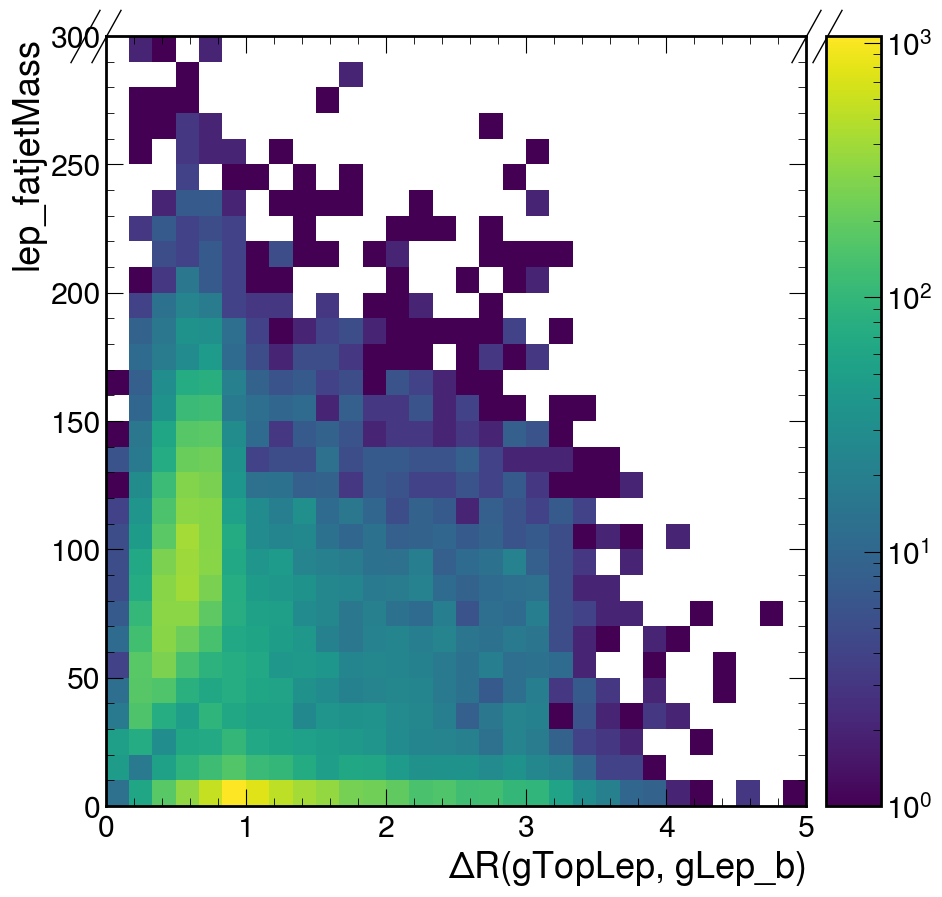

In [75]:
from matplotlib.colors import LogNorm

# Create the figure and axis
fig, ax = plt.subplots()

# Create the histogram
h = Hist(
    hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(gTopLep, gLep_b)"),
    hist.axis.Regular(30, 0, 300, name=r"lep_fatjetMass"),
)

# Fill the histogram with your data
h.fill(
    deltaR(combined_df['first_gTopLep_eta'], combined_df['first_gTopLep_phi'], combined_df['gLep_b_eta'], combined_df['gLep_b_phi']),
    combined_df['lep_fatjetMass'],
)

# Plot the histogram with logarithmic color scale
hep.hist2dplot(h, ax=ax, norm=LogNorm())

# Show the plot
plt.show()

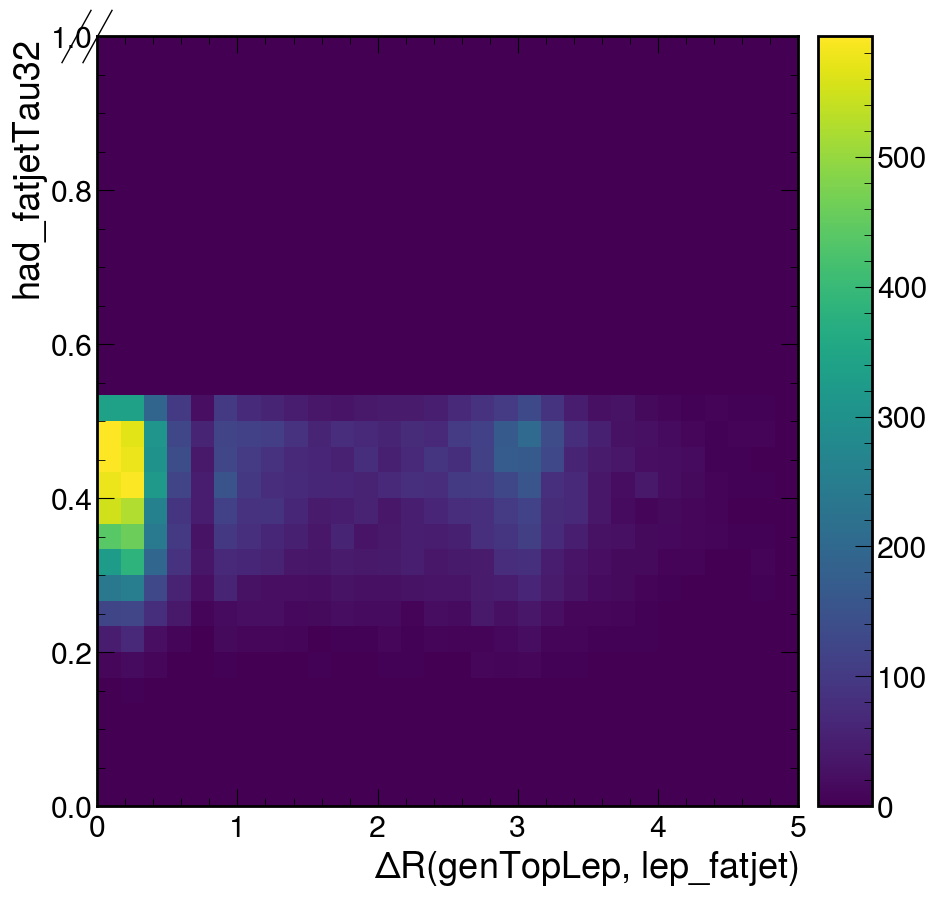

In [76]:
from matplotlib.colors import LogNorm

# Create the figure and axis
fig, ax = plt.subplots()

# Create the histogram
h = Hist(
    hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(genTopLep, lep_fatjet)"),
    hist.axis.Regular(30, 0, 1, name=r"had_fatjetTau32"),
)

# Fill the histogram with your data
h.fill(
    deltaR(combined_df['first_gTopLep_eta'], combined_df['first_gTopLep_phi'], combined_df['lep_fatjetEta'], combined_df['lep_fatjetPhi']),
    combined_df['had_fatjetTau32'],
)

# Plot the histogram with logarithmic color scale
hep.hist2dplot(h, ax=ax)#, norm=LogNorm())

# Show the plot
plt.show()

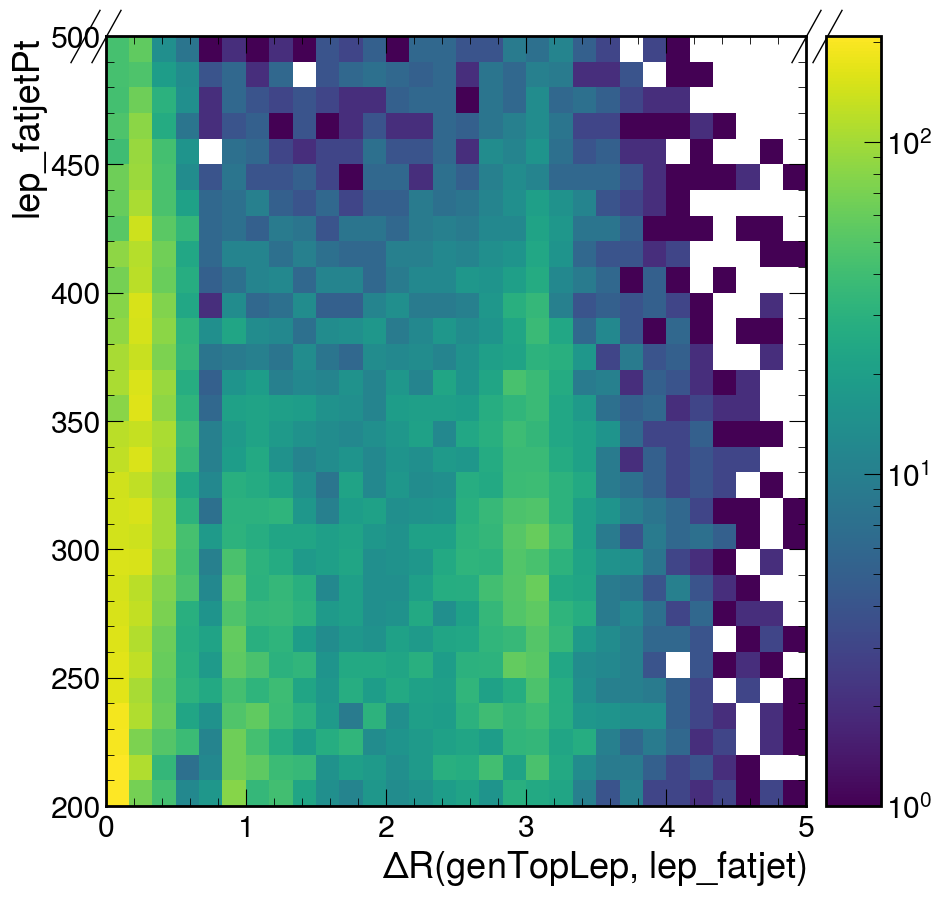

In [77]:
from matplotlib.colors import LogNorm

# Create the figure and axis
fig, ax = plt.subplots()

# Create the histogram
h = Hist(
    hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(genTopLep, lep_fatjet)"),
    hist.axis.Regular(30, 200, 500, name=r"lep_fatjetPt"),
)

# Fill the histogram with your data
h.fill(
    deltaR(combined_df['first_gTopLep_eta'], combined_df['first_gTopLep_phi'], combined_df['lep_fatjetEta'], combined_df['lep_fatjetPhi']),
    combined_df['lep_fatjetPt'],
)

# Plot the histogram with logarithmic color scale
hep.hist2dplot(h, ax=ax, norm=LogNorm())

# Show the plot
plt.show()

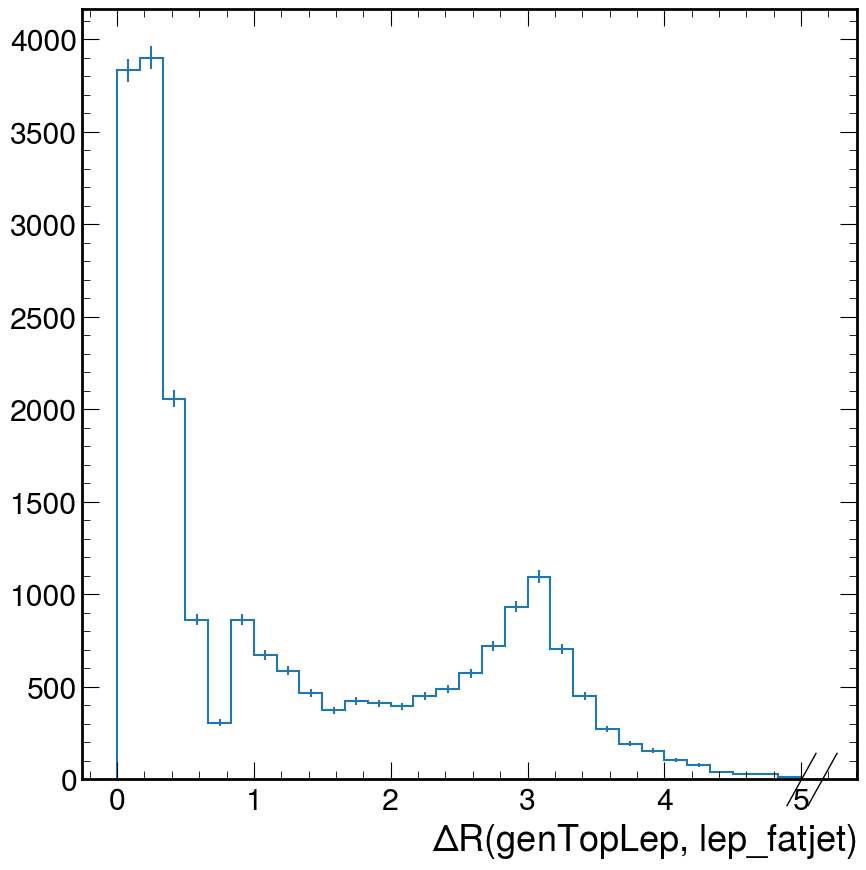

0.4969431091613385

In [78]:
fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(genTopLep, lep_fatjet)"))
h.fill(deltaR(combined_df['first_gTopLep_eta'], combined_df['first_gTopLep_phi'], combined_df['lep_fatjetEta'], combined_df['lep_fatjetPhi']))
hep.histplot(h, ax=ax)
plt.show()

h[:.8j].sum()/h.sum()

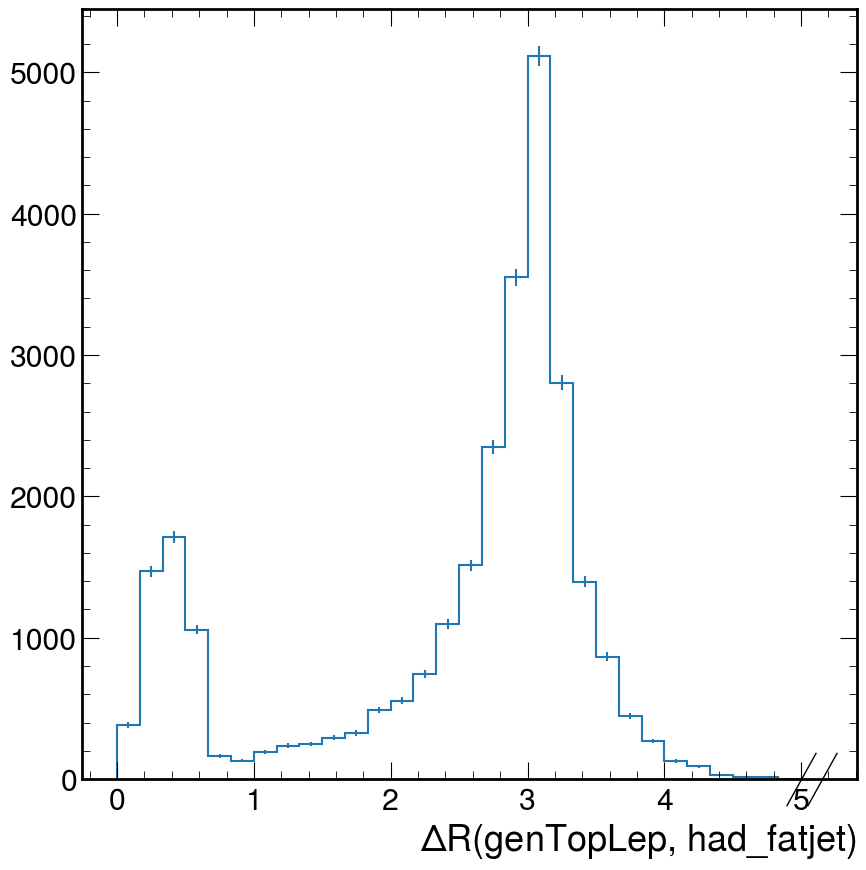

0.16698573234603575

In [79]:
fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(genTopLep, had_fatjet)"))
h.fill(deltaR(combined_df['first_gTopLep_eta'], combined_df['first_gTopLep_phi'], combined_df['had_fatjetEta'], combined_df['had_fatjetPhi']))
hep.histplot(h, ax=ax)
plt.show()

h[:.8j].sum()/h.sum()

KeyError: 'gLep_eta'

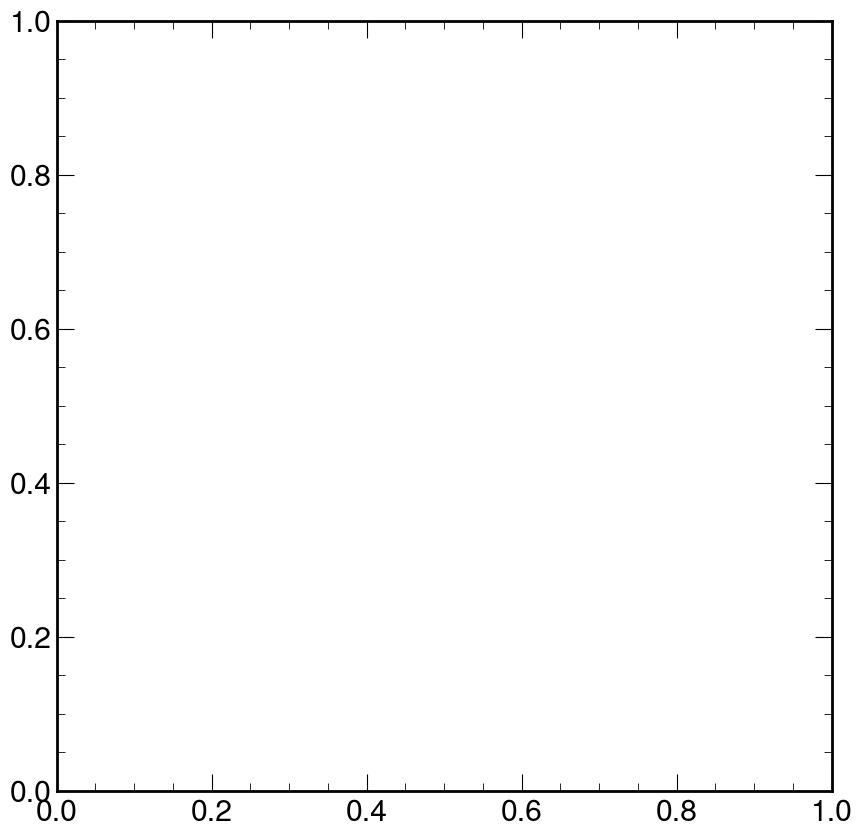

In [80]:
fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(genLep, lep_fatjet)"))
h.fill(deltaR(combined_df['gLep_eta'], combined_df['gLep_phi'], combined_df['lep_fatjetEta'], combined_df['lep_fatjetPhi']))
hep.histplot(h, ax=ax)
plt.show()

h[:.8j].sum()/h.sum()

In [ ]:
fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 5, name=r"$\Delta R$(recoLep, lep_fatjet)"))
h.fill(deltaR(combined_df['lepEta'], combined_df['lepPhi'], combined_df['lep_fatjetEta'], combined_df['lep_fatjetPhi']))
hep.histplot(h, ax=ax)
plt.show()

h[:.8j].sum()/h.sum()

In [ ]:
from matplotlib.colors import LogNorm

# Create the figure and axis
fig, ax = plt.subplots()

# Create the histogram
h = Hist(
    hist.axis.Regular(10, 0, 300, name=r"had_fatjetMass"),
    hist.axis.Regular(10, 0, 300, name=r"lep_fatjetMass"),
)

# Fill the histogram with your data
h.fill(
    combined_df['had_fatjetMass'],
    combined_df['lep_fatjetMass'],
)

# Plot the histogram with logarithmic color scale
hep.hist2dplot(h, ax=ax, norm=LogNorm())

# Show the plot
plt.show()

In [ ]:
fig, ax = plt.subplots()
plot_histogram(ax, combined_df, 'had_fatjetMass', 0, 300, xlabel='fatjetMass')
plot_histogram(ax, combined_df, 'lep_fatjetMass', 0, 300, xlabel='fatjetMass')
plt.show()

fig, ax = plt.subplots()
plot_histogram(ax, combined_df, 'had_fatjetPt', 100, 1200, xlabel='fatjetPt')
plot_histogram(ax, combined_df, 'lep_fatjetPt', 100, 1200, xlabel='fatjetPt')
plt.show()

fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, np.pi, name=r"$\Delta\phi$(had_fatjet, lep_fatjet)"))
h.fill(abs(delta_phi(combined_df['had_fatjetPhi'], combined_df['lep_fatjetPhi'])))
hep.histplot(h, ax=ax)
plt.show()

fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, np.pi, name=r"$\Delta\phi$(MET, had_fatjet)"))
h.fill(abs(delta_phi(combined_df['METphi'], combined_df['had_fatjetPhi'])))
hep.histplot(h, ax=ax)
plt.show()

fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, np.pi, name=r"$\Delta\phi$(MET, lep_fatjet)"))
h.fill(abs(delta_phi(combined_df['METphi'], combined_df['lep_fatjetPhi'])))
hep.histplot(h, ax=ax)
plt.show()

fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 300, name="MET"))
h.fill(combined_df['METpt'])
hep.histplot(h, ax=ax)

fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 1, name="had_subjetBscore"))
h.fill(combined_df['had_subjetBscore'])
hep.histplot(h, ax=ax)
plt.show()

fig, ax = plt.subplots()
h = Hist(hist.axis.Regular(30, 0, 1, name="tau32"))
h.fill(combined_df['had_fatjetTau32'])
hep.histplot(h, ax=ax)
plt.show()
